
# ⛹ Task : 
Your task is to use the same [dataset](https://docs.google.com/spreadsheets/d/e/2PACX-1vT9qetZw-uGS1u44KiW-XOJJkhmX0BKPdcsQ_X9cwTHlsTvlBHbEyA5G_D8r9knBbPOQ7My-W4pTfy2/pub?gid=2140088293&single=true&output=csv) we used in today's sample Clustering hackathon to create clusters using different features than just 'lat' and 'long' that would be useful to either 
> a) Cluster the data using most or all features and analyze those clusters to explain how the clusters are different. **(no train test split required)** OR

> b) Improve a supervised learning model to predict the price of a house.  You can use any model you want, but must include cluster labels as a feature.**If you choose this option, you must train test split.**

# This data is clean and all numeric, so you should be able to go straight into tuning your KMeans model.

The data given is adapted from [Kaggle](https://www.kaggle.com/anthonypino/melbourne-housing-market?select=Melbourne_housing_FULL.csv).The data dictionary is given below:
- price: selling price of home
- rooms: number of rooms other than bedrooms and bathrooms  
- bed: number of bedrooms
- bath: number of bathrooms
- car: number of car spots
- land: land size in meters
- lat: Latitude
- long: Longitude

## In 2 minutes report: 
1. Which task did you choose, a or b?
2. Which features did you use?
3. How many clusters did you make?
4. How are the clusters different? 
  **OR**   
Did they improve your supervised learning model vs not using them?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [4]:
# Load Data
filepath = '/content/drive/MyDrive/Data/Melbourne_housing_small - Melbourne_housing_small.csv'
df = pd.read_csv(filepath)

df.head()

,price,rooms,bed,bath,car,land,lat,long
0,1480000,2,2,1,1,202,-37.7996,144.9984
1,1035000,2,2,1,0,156,-37.8079,144.9934
2,1465000,3,3,2,0,134,-37.8093,144.9944
3,850000,3,3,2,1,94,-37.7969,144.9969
4,1600000,4,3,1,2,120,-37.8072,144.9941


In [5]:
def plot_k_values(data, ks):
  """plot the silhouette score and inertia 
  of a KMeans model for various k values"""

  sils = []
  inertias = []

  for k in ks:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sils.append(silhouette_score(data, km.labels_))
    inertias.append(km.inertia_)
      
    # plot inertia and silhouette score
  fig, ax1 = plt.subplots(figsize=(9,7))
  ax1.set_xlabel('number of clusters')
  ax1.set_ylabel('Inertia', color = 'blue')
  ax1.plot(ks, inertias, color = 'blue',label='inertia',marker ='o')

  ax2 = ax1.twinx()
  
  ax2.set_ylabel('Silhouette Score', color = 'red')
  ax2.plot(ks, sils, color = 'red',label='silhouette score',marker='+')
  ax1.legend(loc=0)  
  ax2.legend(loc='upper left')
  plt.grid()
  plt.show()

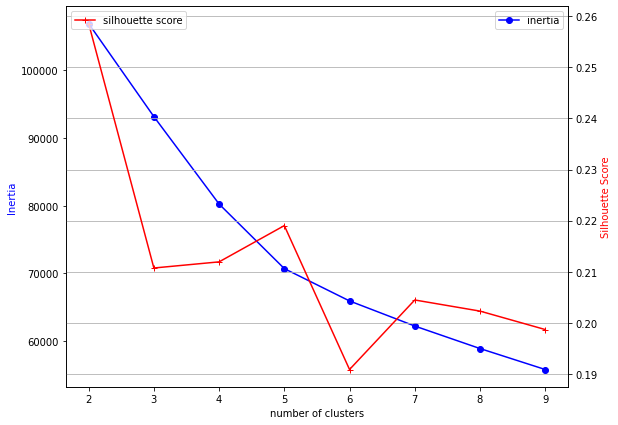

In [12]:
# (a) Cluster the data using most or all features and analyze those clusters to explain how the clusters are different. 
# (no train test split required)
scaler = StandardScaler()

ks = range(2,10)

plot_k_values(scaled_df, ks)

In [15]:
km = KMeans(n_clusters = 2)
km.fit_transform(scaled_df)

array([[1.49273501, 3.40908825],
       [1.64947814, 3.93641684],
       [2.27029047, 2.55979391],
       ...,
       [1.61791846, 3.35814995],
       [1.36428078, 3.65683094],
       [1.77436961, 4.0971659 ]])

In [24]:
# (b) Improve a supervised learning model to predict the price of a house. 
# You can use any model you want, but must include cluster labels as a feature. 
# If you choose this option, you must train test split.
X = df.drop(columns = 'price')
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [27]:
km = KMeans(n_clusters = 5)
km.fit(X_train)

X_train['cluster'] = km.predict(X_train)
X_test['cluster'] = km.predict(X_test)

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

print('Training r2:', model.score(X_train, y_train))
print('Testing r2:', model.score(X_test, y_test))

Training r2: 0.30707766034310213
Testing r2: 0.2888605235003646
